# 计算物理第五次作业
姓名：王兴未 学号：2018302020138 班级：18级3班

**3.11** For the three values of $F_D$ shown in Figure 3.6, compute and plot the total energy of the system as a function of the time and discuss the results.

## Problem 3.11

物理摆的微分方程满足：
$$ \frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta - q\frac{d\theta}{dt} + F_Dsin(\Omega_D t)$$
其中，$\theta$为摆与竖直方向的夹角。右侧第一项为重力，第二项为阻力，第三项为外加驱动力。式中，$q$和$F_D$分别为阻力和驱动力的系数，$\Omega_D$代表驱动力的频率（我们认为驱动力是随时间变化）；$g$为重力加速度；$l$为摆长。

可分写为：
$$\frac{d\omega}{dt} = -\frac{g}{l}sin\theta - q\frac{d\theta}{dt} + F_Dsin(\Omega_D t) $$
$$\frac{d\theta}{dt} = \omega $$

根据Euler-Cromer method:

for each time step i:
$$\omega_{i+1} = \omega_i - [(\frac{g}{l}sin\theta_i + q\omega_i - F_Dsin(\Omega_D t_i)]dt $$

$$\theta_{i+1} = \theta_i + \omega_{i+1}dt $$
And if $\theta$ is bigger than $\pi$, add or minus 2$\pi$ to keep it in [-$\pi$ , $\pi$]

而系统能量$E$与各参量间有如下关系:
$$E = \frac{1}{2}m\omega^2 l^2 + mgl(1 - cos\theta)$$
也即：
$$E_{i+1} = \frac{1}{2}m\omega_{i}^2 l^2 + mgl(1 - cos\theta_i)$$

只需计算出每个时间$t_i$对应的系统能量$E_i$，即可作图。程序框架与前几次作业大体相似。

有关数据取$g = 9.8m/s$, $l = 10m$, $m = 10kg$, $q = 0.5$, $\Omega_D = 2/3$, $dt = 0.01s$

初始条件$\theta_0 = 0.2$, $\omega_0 = 0$

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class pendulum(object):
    def __init__(self, F_D, init_theta = 0.2, init_omega = 0, length = 10, mess = 10, maxtime = 60, time_step = 0.01):
        self.l = length
        self.m = mess
        self.g = 9.8
        self.dt = time_step
        self.F_D = F_D
        self.q = 0.5
        self.omega_D = 2/3
        self.theta = [init_theta]
        self.omega = [init_omega]
        self.energy = [0.5 * mess * (init_omega ** 2) * (length ** 2) + mess * self.g * self.l * (1 - np.cos(init_theta))]
        self.time = [0]
        self.maxtime = maxtime
        
    def append_energy(self):
        self.energy.append(0.5 * self.m * (self.omega[-1] ** 2) * (self.l ** 2) + self.m * self.g * self.l * (1 - np.cos(self.theta[-1])))
        
    def gravity(self):
        return self.g / self.l * np.sin(self.theta[-1])
    def friction(self):
        return self.q * self.omega[-1]
    def drive_force(self):
        return self.F_D * np.sin(self.omega_D * self.time[-1])
        
    def motion(self):
        while(self.time[-1] < self.maxtime):
            self.omega.append(self.omega[-1] + (-self.gravity() - self.friction() + self.drive_force()) * self.dt)
            self.theta.append(self.theta[-1] + self.omega[-1] * self.dt)
            self.append_energy()
            self.time.append(self.time[-1] + self.dt)
    
    def plot_energy_time(self):
        plt.plot(self.time, self.energy, label = 'energy')
        plt.xlabel("time / s")
        plt.ylabel("energy / J")
        plt.title("Energy of system with F_D = {}".format(self.F_D))
        plt.grid()
        plt.show()
    def plot_theta_time(self):
        plt.plot(self.time, self.theta)
        plt.xlabel("time / s")
        plt.ylabel("theta / radians")
        plt.title("Theta of system with F_D = {}".format(self.F_D))
        plt.grid()
        plt.show()
    def plot_omega_time(self):
        plt.plot(self.time, self.omega)
        plt.xlabel("time / s")
        plt.ylabel("omega / s^-1")
        plt.title("Omega of system with F_D = {}".format(self.F_D))
        plt.grid()
        plt.show()
    def plot_omega_theta(self):
        plt.plot(self.theta, self.omega)
        plt.xlabel("theta / radians")
        plt.ylabel("omega / s^-1")
        plt.title("Omega - theta graph of system with F_D = {}".format(self.F_D))
        plt.grid()
        plt.show()
    def plot_energy_driveforce(self, initial_time):
        driveforcelist = []
        for time in self.time[int(initial_time / self.dt) :]:
            driveforcelist.append(self.F_D * np.sin(self.omega_D * time))
        plt.plot(driveforcelist, self.energy[int(initial_time / self.dt) :])
        plt.xlabel("drive force / N")
        plt.ylabel("energy / J")
        plt.title("energy - force graph of system with F_D = {}".format(self.F_D))
        plt.grid()
        plt.show()
    def plot_kinetic_energy_time(self):
        kinetic_energy = []
        for i in range(len(self.omega)):
            kinetic_energy.append(0.5 * self.m * (self.omega[i] ** 2) * (self.l ** 2))
        plt.plot(self.time, kinetic_energy, color = 'r', label = "kinetic energy")
    def plot_potential_energy_time(self):
        potential_energy = []
        for i in range(len(self.theta)):
            potential_energy.append(self.m * self.g * self.l * (1 - np.cos(self.theta[i])))
        plt.plot(self.time, potential_energy, color = 'g', label = 'potential energy')
        plt.xlabel("time / s")
        plt.ylabel("energy / J")
        plt.title("Potential & kinetic energy of system with F_D = {}".format(self.F_D))
        plt.legend()
        plt.show()

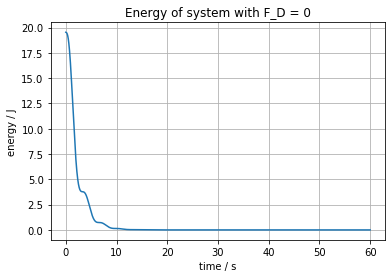

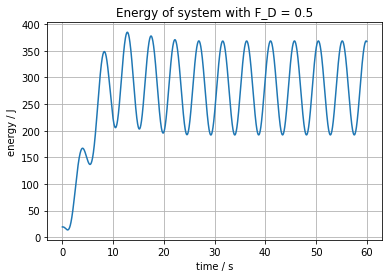

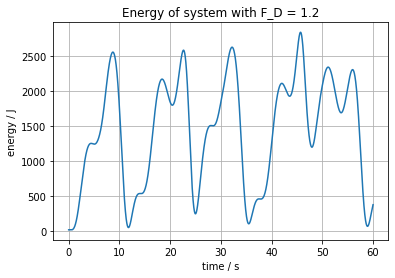

In [3]:
for F_Di in [0, 0.5, 1.2]:
    ball = pendulum(F_Di)
    ball.motion()
    ball.plot_energy_time()

## 讨论
我们将在接下来讨论三个内容：
* 三种$F_D$情况下E-t图像的分析（主要是$F_D = 0.5$情况下的讨论）
* 混沌性产生的临界系数
* 当$F_D$增大时出现的'反常'周期性现象

### 一、三种$F_D$情况下E-t图像的分析

#### 1.$F_D = 0$

在这种情况下，系统无外界驱动力，仅有一个耗散力。故系统初始有势能约20J，并在耗散力作用下逐渐转化为热能而失去。最终系统静止。

#### 2.$F_D = 0.5$

可以看到，图像分为两个阶段。在前一阶段，在外加驱动力的作用下，能量逐步上升；随后在t = 15s左右开始振荡。我们猜测能量的振动与$\theta$类似，都与外加驱动力的振动周期相关。我们不妨作$E - F_D$图像来验证我们的猜测。

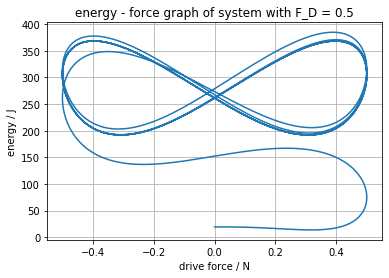

In [4]:
ball = pendulum(0.5)
ball.motion()
ball.plot_energy_driveforce(0)

可以看到，$E - F_D$图像在最开始的一段曲线变化后,形成了非常漂亮的Lissajous图形。我们去除前25s的数据，再次作图。

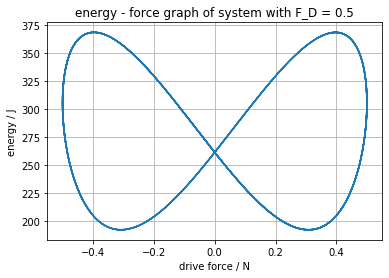

In [5]:
ball.plot_energy_driveforce(25)

去除了前25s的数据后，我们得到了标准的lissajous图形。

由Lissajous图形的规律：
$$\frac{f_y}{f_x} = \frac{n_x}{n_y}$$
其中$f_x$、$f_y$为x、y方向正弦量的频率，$n_x$、$n_y$为图形在x、y方向的切点数。

显然，我们可得：$$\frac{f_{energy}}{f_{driveforce}} = 2$$
故能量的振动周期是驱动力周期的1/2。

为探究其周期为原周期的1/2的原因，我们可以尝试做系统的动能与势能与时间的图像。

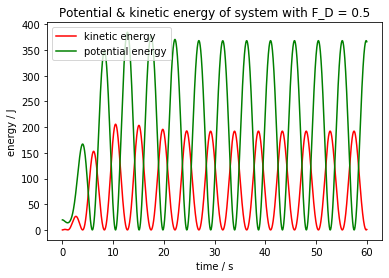

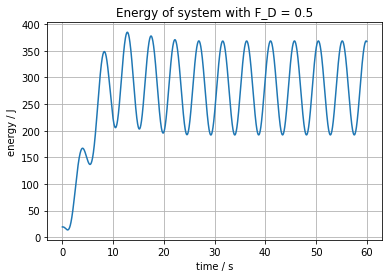

In [6]:
ball.plot_kinetic_energy_time()
ball.plot_potential_energy_time()
ball.plot_energy_time()

由上图可知，在10s后，动能与势能均为周期函数，且动能和势能的周期均为驱动力周期的0.5倍。这一结果我们可证明如下：


由教材知，在$F_D = 0.5$情况下，$\theta$会在一段时间后变为正弦量，且其频率与驱动力相同。故我们可设：
$$\theta = sin(\Omega_D t + \phi)$$
则由$\omega = \frac{d\theta}{dt}$，可得：
$$\omega = \frac{dsin(\Omega_D t + \phi)}{dt} = \Omega_D cos(\Omega_D t + \phi)$$
也为正弦量。又动能：$$E_k = \frac{1}{2}m\omega^2 l^2$$
$$E_k \propto \omega^2$$
又$$\omega^2 = \Omega_D^2 cos^2(\Omega_D t + \phi)$$
由公式$cos^2\theta = \frac{1+cos2\theta}{2}$:
$$\omega^2 = \Omega_D^2\frac{1+cos(2(\Omega_D t + \phi))}{2}$$
故动能$E_k$的周期为$\pi/\Omega_D$，为原周期的1/2.


同样的，势能：
$$E_p = mgl(1 - cos\theta)$$
$$E_p \propto cos(sin(\Omega_D t + \phi))$$
又$cos\theta$为偶函数，则：
\begin{align}cos(sin(\Omega_D t + \phi)) &= cos(-sin(\Omega_D t + \phi))\\&= cos(sin(\Omega_D t + \phi + \pi))\\&=cos(sin(\Omega_D(t + \frac{\pi}{\Omega_D}) + \phi))\end{align}
故$E_p$的周期也为$\pi/\Omega_D$，为原周期的1/2.


又由图知，动能和势能的极大值与极小值交错，且势能的极大值较大。则动能取极小值时，整个函数有极大值；势能取极小值时，整个函数有极小值。

至此，我们有关$F_D = 0.5$的能量图像讨论完毕。

#### 3.$F_D = 1.2$

当F_D变大时，出现了明显的混沌效应。我们可以尝试延长运动的时间，以判断这一曲线在长时间跨度下有没有周期性。

我们取maxtime = 300s

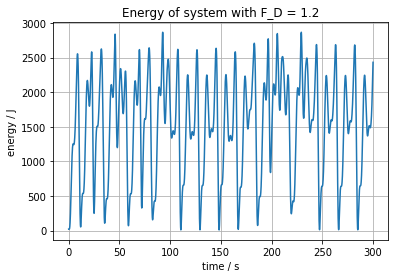

In [80]:
ball = pendulum(1.2, maxtime = 300)
ball.motion()
ball.plot_energy_time()

在长周期下，我们发现当t大于100s时，出现了一定的周期性，即能量会先有一个大幅度的下降，回升后再有一个小幅度的下降，如此往复。

但这一规律并不是完全严格的。观察图像可以发现，在t=210s左右即不遵守该规律；同时，每次上升/下降的变化幅度也略有不同。

我们可以尝试在更长时间跨度下来观察运动图像。但最终也会发现并不呈现怎样的周期性。

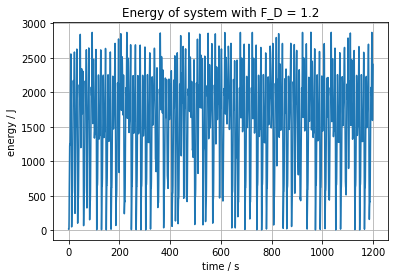

In [82]:
ball = pendulum(1.2, maxtime = 1200)
ball.motion()
ball.plot_energy_time()

### 二、混沌性产生的临界系数$F_D$

接下来，我们尝试讨论混沌性与$F_D$间的关系。首先，我们要定义混沌性的一个度量。

对于$F_D =0$及$F_D = 0.5$两段，在经历了初始的不稳定状态后，在一个长度为$\frac{\pi}{\Omega_D}$的区间上的积分值都是恒定的。而对$F_D = 1.2$，在不同区间上的积分值有所不同。我们尝试利用与相邻两段区间内积分的差的量来定义*混沌度c*。

**定义（混沌度c）**：

设$y = f(t)$是某一量y关于时间t的函数，$f(t)$连续可积，则我们记：
$$c_n = \left|\frac{\int_{t_{n-1}}^{t_n}f(t)dt - \int_{t_n}^{t_{n+1}}f(t)dt}{\int_{t_{n-1}}^{t_{n+1}}f(t)dt}\right|$$
为$t_n$时刻对应的混沌度。

$t_n$与$t_{n+1}$间满足$t_{n+1} = t_n + T$

取$c = max(c_1, c_2,\ldots ,c_n)$，记为$f(t)$对应的混沌度。

应当指出的是，混沌度的定义是没有经过验证或数学证明的，单纯的是我瞎推断的一个定义，接下来我们来计算这一值。取$t_0 = 120s, T = 1.5\pi$

In [15]:
class chaos_pendulum(pendulum):
    def integral_of_energy(self, init_time, T):
        start = int(init_time / self.dt)
        step = int(T / self.dt)
        integral = 0
        for i in range(step):
            integral += self.dt * self.energy[start + i]
        return integral
    
    def degree_of_chaos(self, t_n, T):
        cn = (self.integral_of_energy(t_n - T, T) - self.integral_of_energy(t_n, T)) / (self.integral_of_energy(t_n - T, T) + self.integral_of_energy(t_n, T))
        return np.abs(cn)
    
    def compute_c(self, init_time, T):
        c = []
        for i in range(int((self.maxtime - init_time) / T)):
            c.append(self.degree_of_chaos(init_time + i * T, T))
        c_np = np.asarray(c)
        return c_np.max()

In [21]:
for FD in [0, 0.5, 1.2]:
    ball = chaos_pendulum(FD, maxtime = 500)
    ball.motion()
    print('The c of F_D = {} is {:.4f}'.format(FD, ball.compute_c(120, 1.5 * np.pi)))

The c of F_D = 0 is 0.9035
The c of F_D = 0.5 is 0.0000
The c of F_D = 1.2 is 0.6067


可以看到，当$F_D$为0时，这一值很大。这是因为我们在定义中使用了积分之比，而对于$F_D$等于0的情况，其系统能量最终趋于0.在计算中，得到的值并不为0，而是一个很小的数字，用这样的方式计算出的积分并不具有代表性。

当$F_D$ = 0.5时，符合我们对混沌度c的猜想，即其差为0；在$F_D$ = 1.2时，这一值约为0.6.

我们剔除$F_D$ = 0，然后画一张$c - F_D$图像。

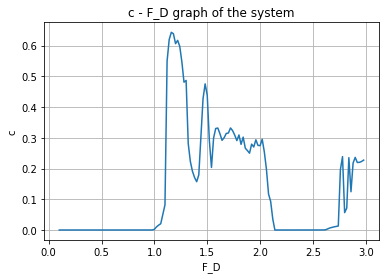

In [24]:
c_list = []
for FD in np.arange(0.1, 3, 0.02):
    ball = chaos_pendulum(FD, maxtime = 500)
    ball.motion()
    c_list.append(ball.compute_c(120, 1.5 * np.pi))
plt.plot(np.arange(0.1, 3, 0.02), c_list)
plt.xlabel('F_D')
plt.ylabel('c')
plt.title('c - F_D graph of the system')
plt.grid()
plt.show()

由图像发现，$F_D$由0至1及由2.1至2.6段都出现了c为零，显然，c的值为0代表良好的周期性。为讨论出现混沌现象的临界参数，我们先做$F_D$ = 1附近的一些图像。

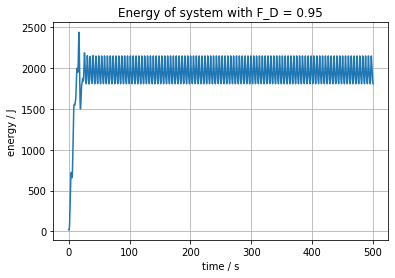

The c of F_D = 0.95 is 0.0000


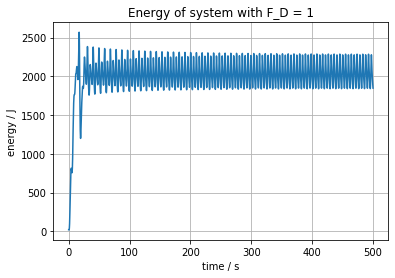

The c of F_D = 1 is 0.0022


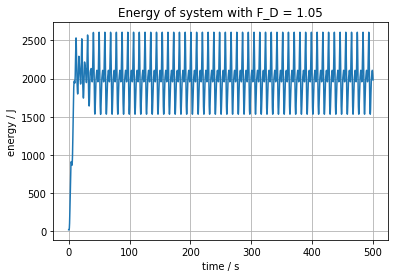

The c of F_D = 1.05 is 0.0182


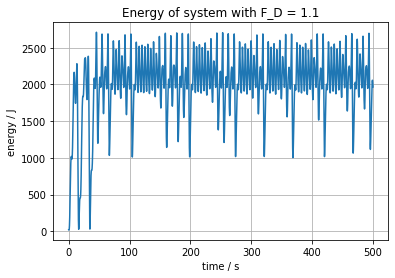

The c of F_D = 1.1 is 0.0820


In [28]:
for FD in [0.95, 1, 1.05, 1.1]:
    ball = chaos_pendulum(FD, maxtime = 500)
    ball.motion()
    ball.plot_energy_time()
    print('The c of F_D = {} is {:.4f}'.format(FD, ball.compute_c(120, 1.5 * np.pi)))

当$F_D$大于1.05后，出现了明显的混沌现象（$F_D$ = 1时c不为0是因为在未达平衡时即计算其混沌度，而1.05时不是0则可能是因为其周期大于$\frac{\pi}{\Omega_D}$)，我们对区间(1.05, 1.1)再次细分并扩大积分周期。

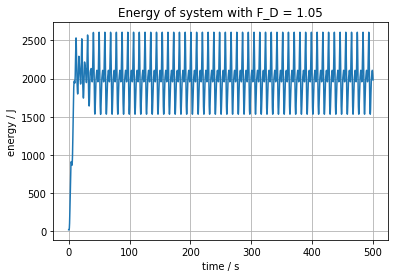

The c of F_D = 1.05 is 0.0000


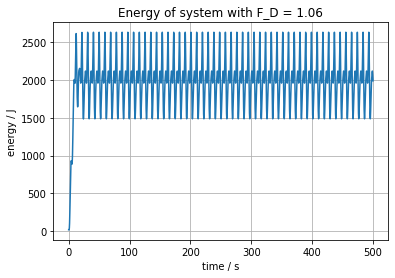

The c of F_D = 1.06 is 0.0000


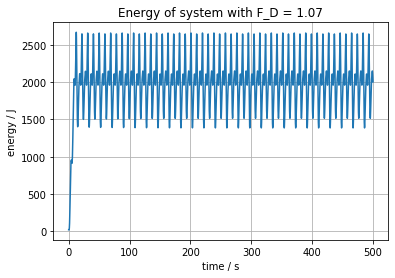

The c of F_D = 1.07 is 0.0000


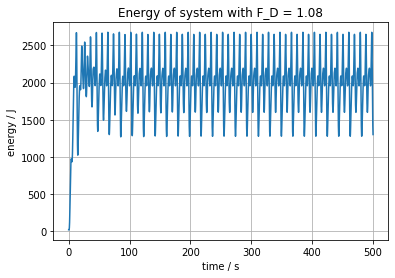

The c of F_D = 1.08 is 0.0004


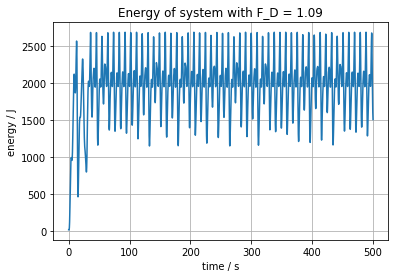

The c of F_D = 1.09 is 0.0209


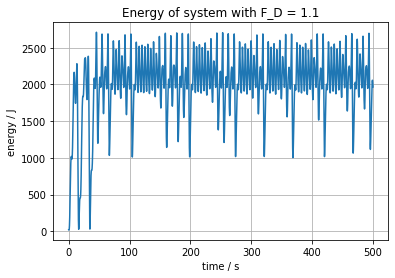

The c of F_D = 1.1 is 0.0497


In [37]:
for FD in np.arange(1.05, 1.1, 0.01):
    ball = chaos_pendulum(FD, maxtime = 500)
    ball.motion()
    ball.plot_energy_time()
    print('The c of F_D = {} is {:.4f}'.format(FD, ball.compute_c(120, 6 * np.pi)))

当F_D = 1.09时，出现了明显的混沌效应，而F_D = 1.08则具有相对较为良好的周期性。因此，我们可认为，F_D = 1.09为出现混沌效应的临界参数。

### 三、$F_D$增大时的‘反常’周期性现象
由c - F_D图我们可以看到，当F_D介于2.1与2.6之间时，突然出现了反常的c=0现象。我们来画F_D = 2.3的图像，并计算c值。

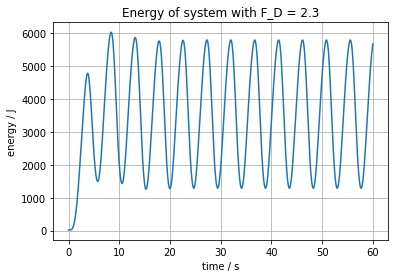

The c of F_D = 2.3 is 0.0002


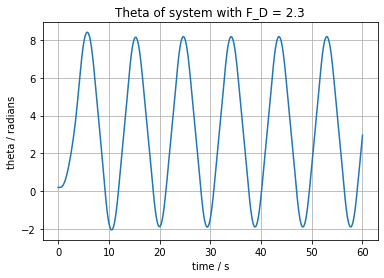

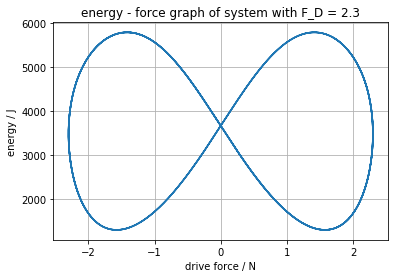

In [41]:
ball = chaos_pendulum(2.3, maxtime = 60)
ball.motion()
ball.plot_energy_time()
print('The c of F_D = 2.3 is {:.4f}'.format(ball.compute_c(30, 1.5 * np.pi)))
ball.plot_theta_time()
ball.plot_energy_driveforce(25)

显然，这种状态与F_D = 0.5类似，都是$\theta$与驱动力频率一致所致。其具体的数学原理不明，不过这可能就是混沌中的规律性的体现。

我们猜测这种情况的出现是周期性的，即随着F_D的增大，这种反常周期性的现象会重复出现。

为此，我们取步长为0.2，画F_D介于0-10的c - F_D图像。

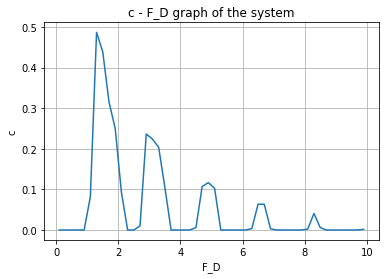

In [42]:
c_list = []
for FD in np.arange(0.1, 10, 0.2):
    ball = chaos_pendulum(FD, maxtime = 500)
    ball.motion()
    c_list.append(ball.compute_c(120, 1.5 * np.pi))
plt.plot(np.arange(0.1, 10, 0.2), c_list)
plt.xlabel('F_D')
plt.ylabel('c')
plt.title('c - F_D graph of the system')
plt.grid()
plt.show()

可以看到，随着F_D的增大，这种周期性现象变得越来越明显，反而是混沌性越来越低，持续的F_D区间也越来越短。

从物理上来看，当外加驱动力越来越大时，$\theta$越来越受驱动力的支配，因而越来越倾向于与驱动力保持一致，从而越来越体现出这种规律性。

同时，对于混沌部分来说，其混沌度c与F_D之间呈现出了类似反比的关系。这我已经完全找不到物理解释了。

总之，对于物理摆来说，'反常'的规律性并不反常。稳定的规律性才是其最终的归属，混沌性不过是昙花一现罢了。

我们的讨论以F_D从0至20，步长为0.1的图像c - F_D作结。

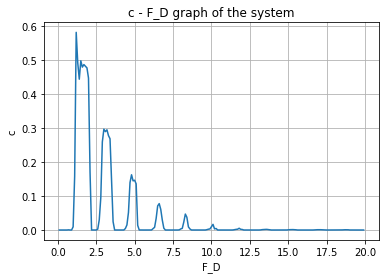

In [49]:
c_list = []
for FD in np.arange(0.1, 20, 0.1):
    ball = chaos_pendulum(FD, maxtime = 180)
    ball.motion()
    c_list.append(ball.compute_c(90, 1.5 * np.pi))
plt.plot(np.arange(0.1, 20, 0.1), c_list)
plt.xlabel('F_D')
plt.ylabel('c')
plt.title('c - F_D graph of the system')
plt.grid()
plt.show()

**3.13** Write a program to calculate and compare the behavior of two, nearly identical pendulums. Use it to calculate the divergence of two nearby trajectories in the chaotic regime, as in Figure 3.7, and make a qualitative estimate of the corresponding Lyapunov exponent from the slope of a plot of $\log(\Delta\theta)$ as a function of $t$.

## Problem 3.13

本题尝试讨论两个只有微小差距（初始条件中$\delta \theta = 0.001$）的系统在不同的F_D作用下，其角度差距随时间的变化，并进行拟合以计算Lyapunov exponent $\lambda$。

角度差随时间的变化的图像并不难画，要注意的时这里的角度差要取绝对值。拟合部分，我们可以取所有极值点来拟合。根据费马定理，极值点的导数为0，由这一特性我们即可得出在离散条件下求极值点的方式：
$$\delta \theta_i \; where \; \frac{d}{dt}\delta \theta_i \times \frac{d}{dt}\delta \theta_{i+1} < 0 $$
又我们只需取极大值，则：
$$\frac{d}{dt}\delta \theta_i > 0$$
其中，对时间的导数可如下近似计算：
$$\frac{d}{dt}\delta \theta_i = \frac{\delta \theta_{i} - \delta \theta_{i - 1}}{dt}$$
而$dt$恒为正，故其计算可简化为：
$$\frac{d}{dt}\delta \theta_i = C （\delta \theta_{i} - \delta \theta_{i - 1}）$$

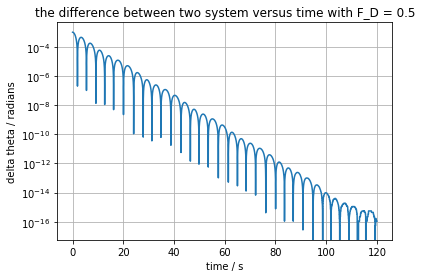

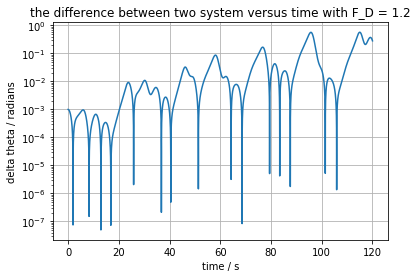

In [11]:
def plot_difference_time(time, theta, FD):
    plt.semilogy(time, theta)
    plt.xlabel("time / s")
    plt.ylabel("delta theta / radians")
    plt.title("the difference between two system versus time with F_D = {}".format(FD))
    plt.grid()
    plt.show()

for FD in [0.5, 1.2]:
    ball_1 = pendulum(FD, time_step = 0.001, maxtime = 120)
    ball_2 = pendulum(FD, init_theta = 0.201, time_step = 0.001, maxtime = 120)
    ball_1.motion()
    ball_2.motion()
    d_theta = np.abs(np.asarray(ball_1.theta) - np.asarray(ball_2.theta))
    plot_difference_time(ball_1.time, d_theta, FD)


## 讨论
我们讨论接下来的三个话题：
* 图像与书中图像不同的原因
* 两种情况下$\lambda$的值
* $\lambda - F_D$ 图像及*混沌度$c$*的可靠度评判

### 一、图像与书中图像不同的原因

对于$F_D = 0.5$的情况，其图像与书上的图像在趋势上大体相似，只是在细节上略有不同。必须指出的是，这种细节的略微不同在上一题中也有所体现。尽管参量取的完全一致，但图像之间依然存在微小的偏差，这可能是由于现代计算机性能优越，误差相对较低所致。

而对于$F_D = 1.2$的情况，二者之差距则变得极其明显。这是由于我们的初始条件中，$l = 10m$而非书上给定的$9.8m$。由于初始条件的微小改变而造成系统状态的极大变化，这是混沌系统对初始条件敏感性的体现之一。

我们取$l = 9.8m$，然后作图进行比较：

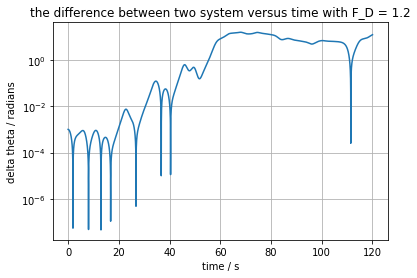

In [12]:
FD = 1.2
ball_1 = pendulum(FD, time_step = 0.001, maxtime = 120, length = 9.8)
ball_2 = pendulum(FD, init_theta = 0.201, time_step = 0.001, maxtime = 120, length = 9.8)
ball_1.motion()
ball_2.motion()
d_theta = np.abs(np.asarray(ball_1.theta) - np.asarray(ball_2.theta))
plot_difference_time(ball_1.time, d_theta, FD)

尽管还存在一定的差距，但可近似认为二者是相近的。

### 二、两种情况下$\lambda$的值

$\lambda$是对角度差取自然对数后进行的一个线性拟合的斜率值。在前面我们曾说过，利用极大值进行线性拟合，而极大值的求法我们是利用未取对数的值进行举例的。将其换成取对数后的值即可按算法进行计算。

线性拟合采用的是numpy.plotfit()

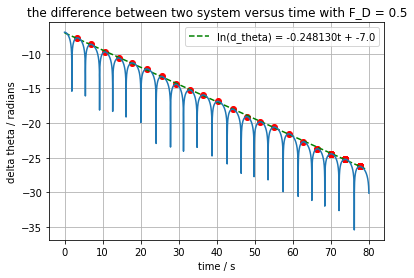

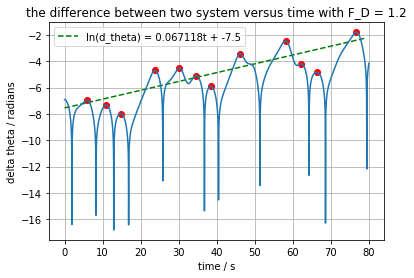

In [29]:
for FD in [0.5, 1.2]:
    ball_1 = pendulum(FD, time_step = 0.001, maxtime = 80)
    ball_2 = pendulum(FD, init_theta = 0.201, time_step = 0.001, maxtime = 80)
    ball_1.motion()
    ball_2.motion()
    
    d_theta = np.abs(np.asarray(ball_1.theta) - np.asarray(ball_2.theta))
    ln_d_theta = np.log(d_theta)
    #Compute the lambda
    max_theta = []
    max_time = []
    for i in range(1, len(ln_d_theta) - 1):
        if(ln_d_theta[i] >= ln_d_theta[i - 1] and ln_d_theta[i] >= ln_d_theta[i + 1]):
            max_theta.append(ln_d_theta[i])
            max_time.append(ball_1.time[i])
    
    plt.plot(max_time, max_theta, 'ro')
    lambda_list = np.polyfit(max_time, max_theta, 1)
    
    fit_y = []
    fit_x = []
    for pp in np.arange(0, ball_1.maxtime, 1):
        fit_x.append(pp)
        fit_y.append(lambda_list[0] * pp + lambda_list[1])
    plt.plot(fit_x, fit_y, 'g--', label = 'ln(d_theta) = {:.6f}t + {:.1f}'.format(lambda_list[0], lambda_list[1]))
    plt.legend()
    #compute end
    plt.plot(ball_1.time, ln_d_theta)
    plt.xlabel("time / s")
    plt.ylabel("delta theta / radians")
    plt.title("the difference between two system versus time with F_D = {}".format(FD))
    plt.grid()
    plt.show()
    
    

由此，我们得到$\lambda_{F_D = 0.5} = -0.248130$, $\lambda_{F_D = 1.2} = 0.067118$

可以看到，我们作图时只采用了前80s的数据。这是因为对于$F_D = 0.5$的情况来说，在90s左右其值为e-15级，在这个阶段，浮点数精度很低，其数据已不可信。故我们去除80s后的数据。

### 三、$\lambda - F_D$图像

在这一部分，我们尝试画出$F_D$介于0-3情况下的图像。

首先，我们猜想当系统处于稳定状态（$c = 0$时），$\lambda$为负；当系统处于混沌状态时，$\lambda$为正。当$F_D = 1.09$时（由上题的讨论第二部分得知，此时处于混沌效应的临界状态），$\lambda$应为0.

下面我们画图来验证我们的猜想

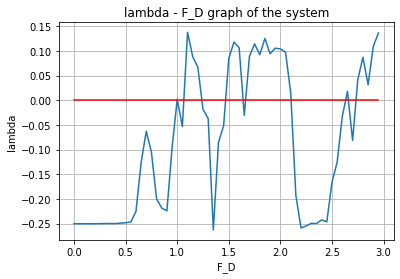

In [33]:
lambda_list_all = []
for FD in np.arange(0, 3, 0.05):
    ball_1 = pendulum(FD, time_step = 0.001, maxtime = 80)
    ball_2 = pendulum(FD, init_theta = 0.201, time_step = 0.001, maxtime = 80)
    ball_1.motion()
    ball_2.motion()
    
    d_theta = np.abs(np.asarray(ball_1.theta) - np.asarray(ball_2.theta))
    ln_d_theta = np.log(d_theta)
    #Compute the lambda
    max_theta = []
    max_time = []
    for i in range(1, len(ln_d_theta) - 1):
        if(ln_d_theta[i] >= ln_d_theta[i - 1] and ln_d_theta[i] >= ln_d_theta[i + 1]):
            max_theta.append(ln_d_theta[i])
            max_time.append(ball_1.time[i])
    
    lambda_list = np.polyfit(max_time, max_theta, 1)
    lambda_list_all.append(lambda_list[0])

zeros = np.zeros(len(np.arange(0, 3, 0.05)))
plt.plot(np.arange(0, 3, 0.05), lambda_list_all)
plt.plot(np.arange(0, 3, 0.05), zeros, 'r')
plt.xlabel('F_D')
plt.ylabel('lambda')
plt.title('lambda - F_D graph of the system')
plt.grid()
plt.show()

与上一题中的$c - F_D$图像进行对比，我们发现这一趋势是大体符合的。但中间也有一些特例并不符合我们的猜想，如$F_D = 1.35$左右。

我们画一下$F_D = 1.35$时的图像

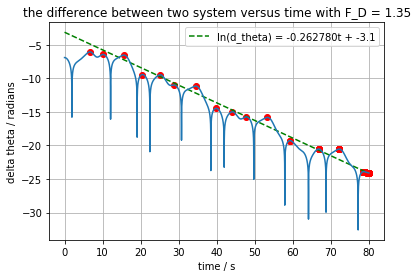

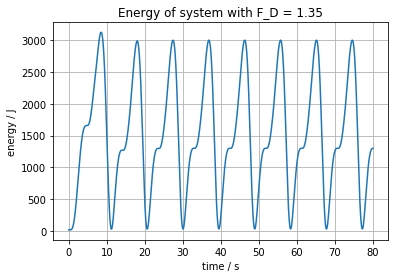

In [39]:
FD = 1.35
ball_1 = pendulum(FD, time_step = 0.001, maxtime = 80)
ball_2 = pendulum(FD, init_theta = 0.201, time_step = 0.001, maxtime = 80)
ball_1.motion()
ball_2.motion()

d_theta = np.abs(np.asarray(ball_1.theta) - np.asarray(ball_2.theta))
ln_d_theta = np.log(d_theta)
#Compute the lambda
max_theta = []
max_time = []
for i in range(1, len(ln_d_theta) - 1):
    if(ln_d_theta[i] >= ln_d_theta[i - 1] and ln_d_theta[i] >= ln_d_theta[i + 1]):
        max_theta.append(ln_d_theta[i])
        max_time.append(ball_1.time[i])

plt.plot(max_time, max_theta, 'ro')
lambda_list = np.polyfit(max_time, max_theta, 1)

fit_y = []
fit_x = []
for pp in np.arange(0, ball_1.maxtime, 1):
    fit_x.append(pp)
    fit_y.append(lambda_list[0] * pp + lambda_list[1])
plt.plot(fit_x, fit_y, 'g--', label = 'ln(d_theta) = {:.6f}t + {:.1f}'.format(lambda_list[0], lambda_list[1]))
plt.legend()
#compute end
plt.plot(ball_1.time, ln_d_theta)
plt.xlabel("time / s")
plt.ylabel("delta theta / radians")
plt.title("the difference between two system versus time with F_D = {}".format(FD))
plt.grid()
plt.show()
ball_1.plot_energy_time()

在$F_D = 1.35$时，系统实际上呈现出非正弦的周期性规律，其周期大于我们的混沌度计算时的周期T（猜测为4倍驱动力周期）。在这种情况下，我们的混沌度c的计算周期T仅能包括半个周期，使相邻两个区间T内的积分值之差为恒定值（相邻两个半周期的积分之差，是恒定值），但不为0.即对于这种具有复杂周期性（长周期）的现象，混沌度c无法检测。因此，我们认为c的可靠性并不完善。

当然，也可以通过延长c的计算周期T来容纳更长周期；或者，更进一步的，引入动态周期。

具有混沌现象的系统无周期性。那么假设某个系统具有周期性，在T增大到某一有限值之后必然会接近于0。通过逐步增加计算周期T，我们即可得到一些具有复杂周期性的系统其混沌度$c'$也为0.